In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #不能运行的话改成SimHei
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

Missing colon in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 (' 中文字体')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 759 ('font.family: sans-serif')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 760 ('font.sans-serif: Arial Unicode MS, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/sunbaile/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 761 ('axes.unicode_minus: False')


# 原始数据

In [10]:
x = np.array([0,0.5,0.7,0.8,0.85,0.9,0.95,1.0,
              1.05,1.1,1.15,1.2,1.25,1.3,1.35,
              1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.8,2.0,3.0])
y = np.array([100,100,100,99,99,98,94,87,77,65,
              54,43,33,26,18,13,8,5,3,2,1,0,0,1,1])
y_h = np.array([100,98,97,96,93,93,87,87,69,56,46,36,26,18,13,8,5,3,2,1,1,0,1,2,3])
print(x.shape == y.shape)
print(y.shape == y_h.shape)

True
True


# 拟合中间点，四次多项式

In [22]:
f2 = np.polyfit(x[3:-3], y[3:-3], 4) # 采用4次多项式拟合，f2为参数，np.array类型
f3 = np.polyfit(x[3:-3], y_h[3:-3], 4)
xfit = np.linspace(0.9, 1.6, 1000)
yfit2 = np.polyval(f2, xfit) # 得到拟合后的结果，np.array类型
yfit3 = np.polyval(f3, xfit)

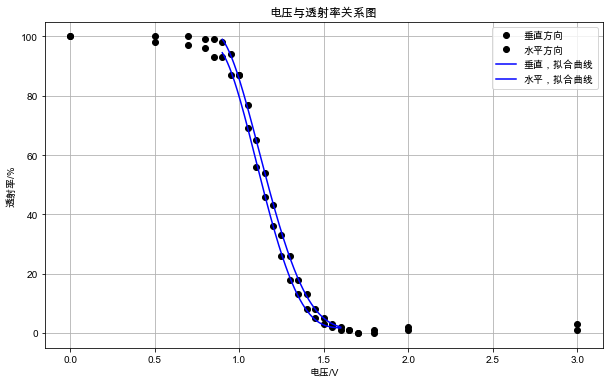

In [23]:
plt.figure(figsize=(10,6))
plt.title(r"电压与透射率关系图")
plt.ylabel(r"透射率/%")
plt.xlabel(r"电压/V")
plt.grid()
plt.plot(x, y, 'ok', label="垂直方向")
plt.plot(x, y_h, 'ok', label="水平方向")
plt.plot(xfit, yfit2, color='b', label="垂直，拟合曲线")
plt.plot(xfit, yfit3, color='b', label="水平，拟合曲线")
plt.legend()

# 找到透射率最接近10%和90%的点

In [40]:
x_10 = xfit[np.argmin(np.abs(yfit2-10))]
y_10 = yfit2[xfit==x_10]
x_90 = xfit[np.argmin(np.abs(yfit2-90))]
y_90 = yfit2[xfit==x_90][0]
print("垂直",x_10,y_10,"|",x_90,y_90)
x_10 = xfit[np.argmin(np.abs(yfit3-10))]
y_10 = yfit3[xfit==x_10]
x_90 = xfit[np.argmin(np.abs(yfit3-90))]
y_90 = yfit3[xfit==x_90][0]
print("水平",x_10,y_10,"|",x_90,y_90)

垂直 1.424824824824825 [9.999595] | 0.9742742742742743 90.01993720903488
水平 1.3722722722722724 [9.97728127] | 0.9392392392392392 90.02092516738912


# 画图

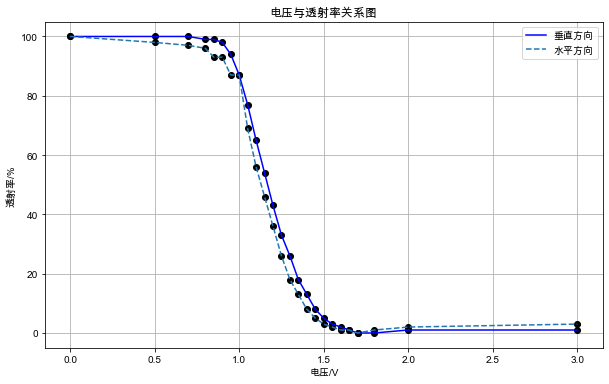

In [44]:
plt.figure(figsize=(10,6))
plt.title(r"电压与透射率关系图")
plt.ylabel(r"透射率/%")
plt.xlabel(r"电压/V")
plt.grid()
plt.plot(x, y, 'ok')
plt.plot(x, y_h, 'ok')
plt.plot(x, y, color='b', label="垂直方向")
plt.plot(x, y_h, '--', label="水平方向")
# plt.text(mark1[0], mark1[1], (float(mark1[1].round(2)), 10),ha='left', va='bottom', fontsize=15, color="r")
# plt.text(mark1[0], mark1[1], (float(mark1[1].round(2)), 10),ha='left', va='bottom', fontsize=15, color="r")
plt.legend()
plt.savefig("液晶电光效应研究.jpg",dpi=150)

### 我承认这是我写过最失败的一次